## Things to improve

* If we use a repeated set of formulae create a function, this prevents repeated variables and makes code more efficient

* If asked, create a function that creates the required values from calculation rather than from a different function

* Try to be more efficient with functions and calculations

* Create arrays in a way that makes sense, store the smaller amount of values in the rows

* Output more values of calculations even if they are not required. Always good to show more information.

# Exploring Stochastic Gradient Descent Curve Fitting - 18003453

In this notebook the stochastic gradient descent algorithm is explored in an attempt to fix different polynomials to a true polynomial with a certain amount of 'noise' added to the signal. Initally a 1st order polynomial is fitted to a 1st order signal. Then after this is explored 1st, 3rd and 7th order polynomials are fitted to a 3rd order polynomial signal with noise. The structure of the polynomials being fitted is given as:

Equation 1:
$$ y(x) =\sum_i  \theta_{i} x^i$$

Where $\theta_{i}$ is a certain parameter of the polynomial and $x^i$ is the coordinate to the power of i.
The algorithm used to update the parameters for fitting to occur is given below:

Equation 2:
$$
\theta_{i+1} = \theta_{i} - \eta_i  \left< \Delta f \frac{\partial f}{\partial \theta} \right>
$$

Where $\eta_i$ is the learning rate and inside the average symbol is the deviation of the polynomial function attemping to be fitted from the true signal, this is mupltiplied by the gradient of the polynomial with respect to the parameter $\theta_{i}$ at the point x.



In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def polyModelWithNoise(x,theta,sigma):
    """Creates an array of values using the parameters for the polynomial inputted.
    Inputs
    x: numpy array of values for coordinates
    theta: parameters of the polynomial
    sigma: standard dev. of noise dist. added to polynomial
    Returns
    y: array of values associated with the polynomial parameters and added noise
    """
    
    y = np.polynomial.polynomial.polyval(x,theta)
    y += np.random.normal(scale=sigma,size=(len(x)))
    
    return y

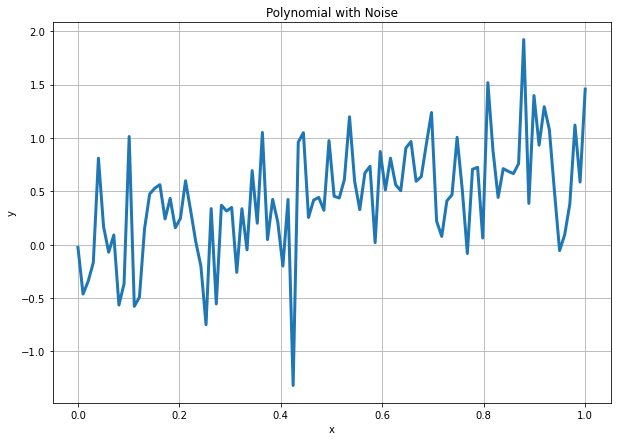

In [3]:
#setting values
x = np.linspace(0,1,100)
sigma = 0.5
theta = np.array([0,1])


y = polyModelWithNoise(x,theta,sigma)

#plotting graph of polynomial

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x,y, linewidth=3)
ax.set_title("Polynomial with Noise")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()

In [4]:
def polyGradient(x,theta):
    """Evaluates gradient values of polynomial with respect to each parameter over an array of coordinates.
    Inputs:
    x: array of coordinates
    theta: array of polynomial parameters
    Returns:
    grad_store: 2D array of polynomial gradients with e=respect to each theta
    """
    n_theta = len(theta)
    #creating gradient storage array
    grad_store = np.zeros(shape=(len(x),n_theta))
    
    for i in range(n_theta):
        grad_store[:,i] = x**i
        
    return grad_store

In [5]:
#initialising
theta = np.array([-1,0.5]) #starting theta vals
eta = 0.5  #learning rate
numSteps = 100 #number of iterations for minimisation
numSamples = 10
sigma = 0.5
true_theta = np.array([0,1]) #truth polynomial

for i in range(numSteps):
    x_samp = np.random.rand(numSamples)  #generating samples
    y_true = polyModelWithNoise(x_samp,true_theta,sigma)    #truth y values
    y = np.polynomial.polynomial.polyval(x_samp,theta) #model y values
    deviation = y - y_true      #difference between true and actual
    theta -= eta*np.average(deviation[:,None]*polyGradient(x_samp,theta),axis=0) #applying algorithm

Text(0.5, 1.0, 'Plotting the true polynomial with noise against the fitted polynomial')

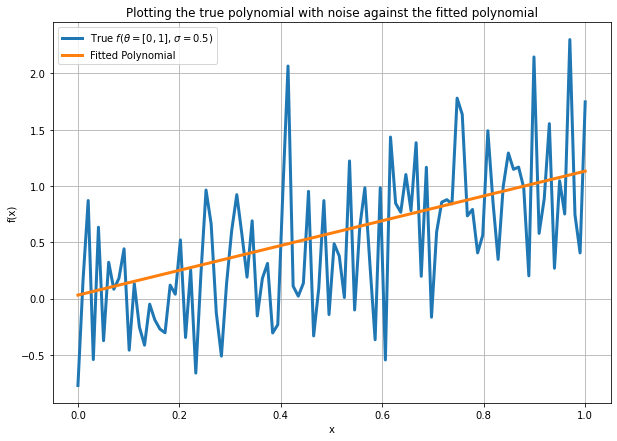

In [6]:
#plotting results from gradient descent
fig, ax = plt.subplots(figsize=(10,7))  
x=np.linspace(0,1,100)  #Get 100 points from 0 to 1
ax.plot(x,polyModelWithNoise(x,true_theta,sigma),linewidth=3,label=r"True $f(\theta=[0,1]$, $\sigma = 0.5)$")
ax.plot(x,np.polynomial.polynomial.polyval(x,theta),linewidth=3,label=r'Fitted Polynomial')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
ax.set_title("Plotting the true polynomial with noise against the fitted polynomial")

## Fitting three different polynomials to the same signal

Below the stochastic gradient descent algorithm is applied three times to fit a 1st, 3rd and 7th order polynomial to the same 3rd order signal with some noise added. Then they are plotted for comparison to see which fitting fairs best, and further attention is then paid to how the fittings fair outside of the training range.

In [7]:
#initialising for fitting algorithsm
theta_new = np.array([0.0,1.0,2.0,2.0]) #true theta vals
sigma = 0.5
eta = 0.5  #learning rate
numSteps = 100 #number of iterations for minimisation
numSamples = 10 #number of random samples taken

In [8]:
# fitting first order polynomial
theta1 = np.array([0.0,1.0]) #starting theta vals

for i in range(numSteps):
    x_samp = np.random.rand(numSamples)  #generating samples
    y_true = polyModelWithNoise(x_samp,theta_new,sigma)    #truth y values
    y = np.polynomial.polynomial.polyval(x_samp,theta1) #model y values
    deviation = y - y_true      #difference between true and actual
    theta1 -= eta*np.average(deviation[:,None]*polyGradient(x_samp,theta1),axis=0) #applying algorithm

In [9]:
# fitting 3rd order polynomial
theta3 = np.array([0.0,1.0,1.0,1.0]) #starting theta vals

for i in range(numSteps):
    x_samp = np.random.rand(numSamples)  #generating samples
    y_true = polyModelWithNoise(x_samp,theta_new,sigma)    #truth y values
    y = np.polynomial.polynomial.polyval(x_samp,theta3) #model y values
    deviation = y - y_true      #difference between true and actual
    theta3 -= eta*np.average(deviation[:,None]*polyGradient(x_samp,theta3),axis=0) #applying algorithm

In [10]:
# fitting 7th order polynomial
theta7 = np.array([0,1.0,1.0,1.0,1.0,1.0,1.0,1.0]) #starting theta vals

for i in range(numSteps):
    x_samp = np.random.rand(numSamples)  #generating samples
    y_true = polyModelWithNoise(x_samp,theta_new,sigma)    #truth y values
    y = np.polynomial.polynomial.polyval(x_samp,theta7) #model y values
    deviation = y - y_true      #difference between true and actual
    theta7 -= eta*np.average(deviation[:,None]*polyGradient(x_samp,theta7),axis=0) #applying algorithm

Theta values for the 1st order polynomial are: [-0.61097171  4.80170294]
Theta values for the 3th order polynomial are: [-0.24190346  1.38645488  1.69792329  1.80947119]
Theta values for the 7th order polynomial are: [0.05995372 1.60699198 1.27659141 0.95518238 0.71953051 0.55722076
 0.44833415 0.37700077]


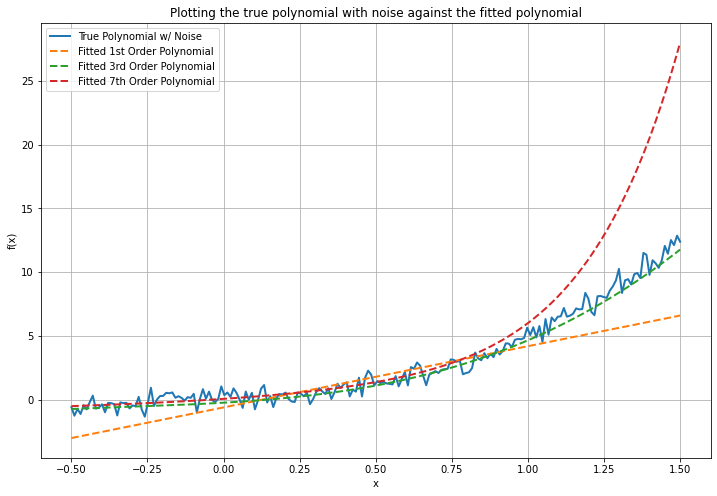

In [11]:
#plotting results from gradient descent
fig, ax = plt.subplots(figsize=(12,8))  
x=np.linspace(-0.5,1.5,200)  #Get 200 points from -0.5 to 1.5
ax.plot(x,polyModelWithNoise(x,theta_new,sigma),linewidth=2,label=r'True Polynomial w/ Noise' )
ax.plot(x,np.polynomial.polynomial.polyval(x,theta1),linewidth=2,label=r'Fitted 1st Order Polynomial',linestyle='--')
ax.plot(x,np.polynomial.polynomial.polyval(x,theta3),linewidth=2,label=r'Fitted 3rd Order Polynomial',linestyle='--')
ax.plot(x,np.polynomial.polynomial.polyval(x,theta7),linewidth=2,label=r'Fitted 7th Order Polynomial',linestyle='--')
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid()
ax.set_title("Plotting the true polynomial with noise against the fitted polynomial")

print('Theta values for the 1st order polynomial are:', theta1)
print('Theta values for the 3th order polynomial are:', theta3)
print('Theta values for the 7th order polynomial are:', theta7)

### Conclusion

The three models aboce fit the data fairly well within their training range, the 1st order model is defintely the worst fit. Outside of the training range the 3rd and 7th order polynomials both have a good fit from 0 to -0.5 however above the range it is clear to see that the 3rd order polynomial is a much better fit than the 7th order. This is most likely due to the true polynomial being 3rd order and so the 7th order polynomial is simply an overfitting and does not require so many parameters. In the same way the 1st order polynomial can be described as an underfitting and so will not ever be a good fit for the line, certainly not outside of the training range, which is shown to be true above, the first order fitting outside the range is extremely poor.

To increase the effectivness of the fitting a larger sample size could be applied as well as more iterations of the cycle. IT would be interesting to see how the learning rate effects the fitting, specifically in the way that the learning rate interacts with the noise from the signal.